In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('placement.csv')

In [2]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [4]:
df.shape

(100, 4)

In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## Steps

1. Preprocess + EDA + Feature Selection
2. Extract input and output cols
3. Scale the values
4. Train test split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

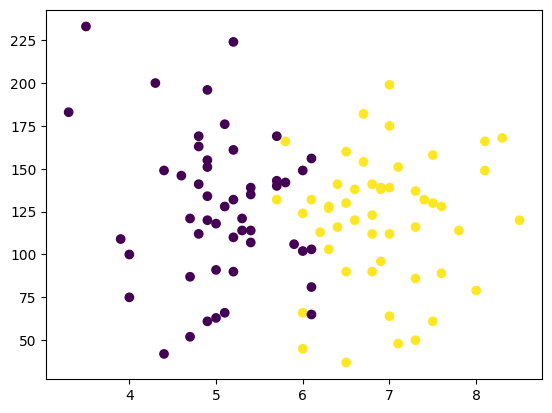

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X, y.shape

(    cgpa     iq
 0    6.8  123.0
 1    5.9  106.0
 2    5.3  121.0
 3    7.4  132.0
 4    5.8  142.0
 ..   ...    ...
 95   4.3  200.0
 96   4.4   42.0
 97   6.7  182.0
 98   6.3  103.0
 99   6.2  113.0
 
 [100 rows x 2 columns],
 (100,))

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [11]:
X_train, y_train, X_test

(    cgpa     iq
 57   6.5  130.0
 36   5.7  140.0
 81   5.4  107.0
 42   7.6   89.0
 78   6.1   81.0
 ..   ...    ...
 75   4.8  169.0
 20   6.6  120.0
 96   4.4   42.0
 34   4.8  163.0
 93   6.8  112.0
 
 [90 rows x 2 columns],
 57    1
 36    0
 81    0
 42    1
 78    0
      ..
 75    0
 20    1
 96    0
 34    0
 93    1
 Name: placement, Length: 90, dtype: int64,
     cgpa     iq
 2    5.3  121.0
 55   7.8  114.0
 63   6.3  128.0
 16   5.2  224.0
 17   3.3  183.0
 67   5.0  118.0
 86   5.1  128.0
 59   4.8  112.0
 26   7.0  199.0
 14   6.1  103.0)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train, X_test

(array([[ 0.41382163,  0.21944666],
        [-0.29898118,  0.47527826],
        [-0.56628223, -0.36896602],
        [ 1.3939255 , -0.82946289],
        [ 0.05742023, -1.03412817],
        [-0.03168012, -1.41787557],
        [ 2.01762796,  1.19160673],
        [ 0.41382163, -2.1597872 ],
        [ 1.75032691, -1.08529449],
        [ 0.41382163, -0.80387973],
        [-1.18998469, -0.01080178],
        [-0.65538259, -0.1898839 ],
        [ 0.77022304,  0.4496951 ],
        [ 0.77022304, -0.65038077],
        [ 0.85932339,  0.4496951 ],
        [ 0.59202234,  0.8334425 ],
        [-0.74448294, -0.80387973],
        [ 1.30482515,  0.21944666],
        [-1.45728575,  0.7055267 ],
        [-1.01178399, -1.54579137],
        [-0.20988083,  0.52644458],
        [-0.83358329, -1.41787557],
        [-0.74448294,  1.01252461],
        [ 0.68112269,  0.50086142],
        [ 0.32472128,  0.50086142],
        [ 1.83942726,  1.14044041],
        [-0.56628223, -0.1898839 ],
        [ 0.85932339, -1.469

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [16]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred = clf.predict(X_test)

In [18]:
y_test

2     0
55    1
63    1
16    0
17    0
67    0
86    0
59    0
26    1
14    0
Name: placement, dtype: int64

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

<Axes: >

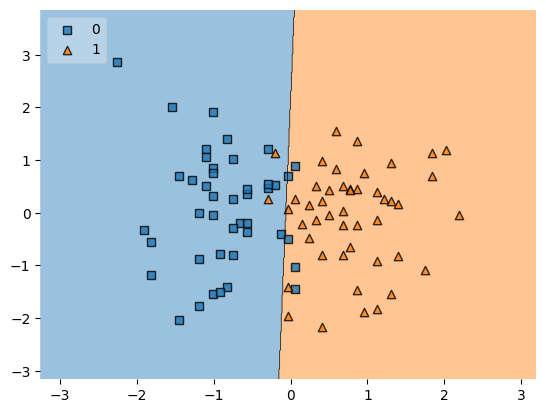

In [20]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [21]:
import pickle

pickle.dump(clf,open('day_13.pkl','wb'))